<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Project - "Capstone Project Of Loan Approval" based on Classification Presented By Nutan Zine
<a class="anchor" id="1"></a> 

## **Table of Contents**
> 1. [Importing Data](#1)
> 2. [Exploratory Data Analysis](#2)
> 3. [Data Cleaning](#3)
> 4. [Logistic Regression](#4)
> 5. [Dicision Tree](#4)
> 6. [Random Forest](#4)
> 7. [SVM](#7)
> 8. [Naive Bayes](#4)
> 9. [K Nearest Neighbors](#8)
> 10. [Choosing a K Value](#9)
> 11. [Evaluation](#10)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Importing Data
<a class="anchor" id="1"></a> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Problem Statment : 
## Where 
## Rows columns
##  In this dataset the target column is loan_status .we have to do the analysis on factors affecting the loan_status
## and create a model that can do the prediction that whether a person will get loan or not .

In [3]:
df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\Machine Learning Module\loan_approval_dataset (1).csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Preprocessing or Fetching Information from the Data
<a class="anchor" id="2"></a> 

In [4]:
print('The columns in the dataset are',df.columns)

The columns in the dataset are Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Data Dictionary
<a class="anchor" id="2"></a> 

In [5]:
## Description of each column 

In [6]:
# no of rows and columns
print(f'There are {df.shape[0]} rows in the data and {df.shape[1]} columns in the data')

There are 4269 rows in the data and 13 columns in the data


In [7]:
## Duplicate checking
df.duplicated().sum()
### No duplicates are there .


0

In [8]:
## Checking for missing value
df.isnull().sum()
## mean ,median ,mode ,knn imputer,simpleimputer


# import numpy as np

# # Importing the SimpleImputer class
# from sklearn.impute import SimpleImputer

# # Imputer object using the mean strategy and 
# # missing_values type for imputation
# imputer = SimpleImputer(missing_values = np.nan, 
# 						strategy ='mean')

# data = [[12, np.nan, 34], [10, 32, np.nan], 
# 		[np.nan, 11, 20]]

# print("Original Data : \n", data)
# # Fitting the data to the imputer object
# imputer = imputer.fit(data)

# # Imputing the data	 
# data = imputer.transform(data)

# print("Imputed Data : \n", data)


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
From this no any null or weired values in our Dataset
<a class="anchor" id="2"></a> 

In [10]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Seperating the Numerical & Categorical Data
<a class="anchor" id="2"></a> 


In [11]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(include='number')
print('The categorical columns are',list(df_cat.columns))
print('***************************************************************************')
print('The Numerical columns are',list(df_num.columns))

The categorical columns are [' education', ' self_employed', ' loan_status']
***************************************************************************
The Numerical columns are ['loan_id', ' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value']


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Analysis Of Categorical Column
<a class="anchor" id="2"></a> 

In [12]:
for i in df_cat.columns:
    print(f'the unique values in {i} are {df_cat[i].unique()}')
    print('The value count for each category is ',df_cat[i].value_counts())
    print('************************************************************************')

the unique values in  education are [' Graduate' ' Not Graduate']
The value count for each category is   education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
************************************************************************
the unique values in  self_employed are [' No' ' Yes']
The value count for each category is   self_employed
Yes    2150
No     2119
Name: count, dtype: int64
************************************************************************
the unique values in  loan_status are [' Approved' ' Rejected']
The value count for each category is   loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
************************************************************************


In [13]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [14]:
## As there is extra space at the starting of each column name we will remove that space
df.columns=df.columns.str.replace(' ','')
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [15]:
## no of Dependent
df['no_of_dependents'].value_counts().sort_values()

no_of_dependents
5    673
1    697
2    708
0    712
3    727
4    752
Name: count, dtype: int64

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Exploratory Data Analysis
<a class="anchor" id="2"></a> 

In [16]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

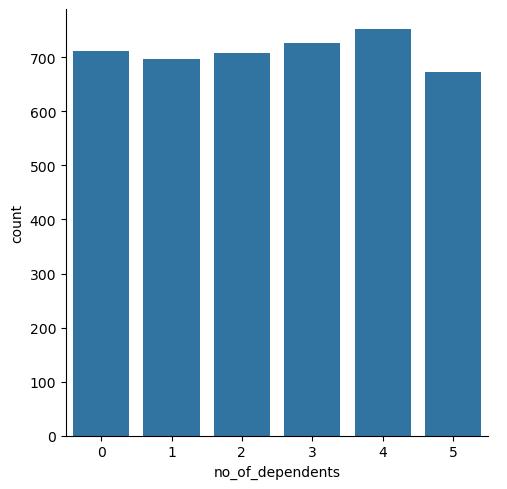

In [17]:
# No of Dependents 
sns.catplot(data=df,x='no_of_dependents',kind='count')
plt.show()
## Insight : From this cat with no of dep =4 is highest and dep=5 is lowest 

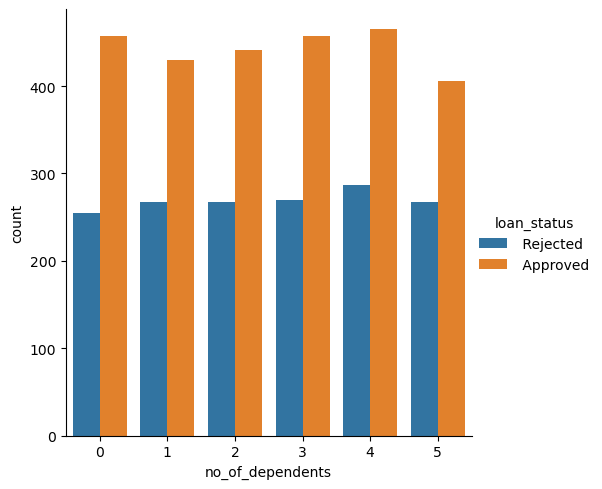

In [18]:
sns.catplot(data=df,x='no_of_dependents',kind='count',hue='loan_status')
plt.show()
# Insight : From here we can observe if the person has less dependents the probability that his loan will be approved 
# is more .

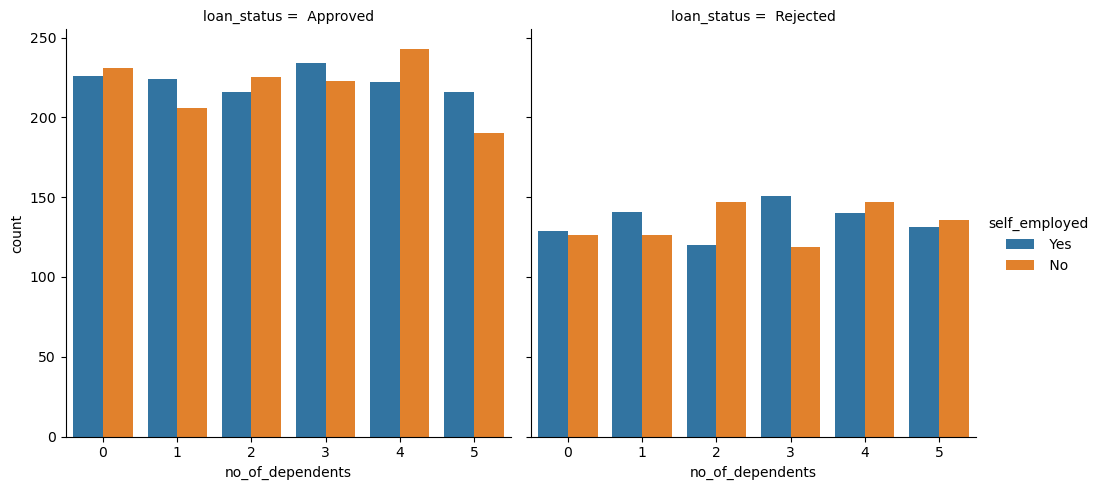

In [19]:
sns.catplot(data=df,x='no_of_dependents',kind='count',hue='self_employed',col='loan_status')
plt.show()
# Insight : Here, no_of_dependents of loan_status = Approved chart has more count as compared to loan_status = Rejected.

In [20]:
df['self_employed'].value_counts()

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

In [21]:
df['education'].value_counts()

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [22]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

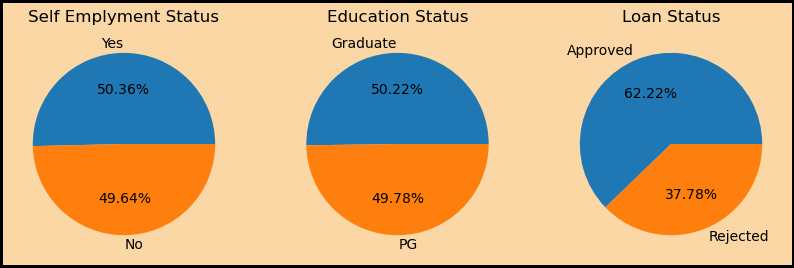

In [23]:
#self employed
plt.figure(figsize=(10,6),edgecolor='black',linewidth=3,facecolor='#fad7a4')
plt.subplot(1,3,1)
plt.pie(df['self_employed'].value_counts(),autopct='%0.2f%%',labels=['Yes','No'])
plt.title('Self Emplyment Status')
plt.subplot(1,3,2)
plt.pie(df['education'].value_counts(),autopct='%0.2f%%',labels=['Graduate','PG'])
plt.title('Education Status')
plt.subplot(1,3,3)
plt.pie(df['loan_status'].value_counts(),autopct='%0.2f%%',labels=['Approved','Rejected'])
plt.title('Loan Status')
plt.show()
# Insights : Here, Self Employment Status is more as compared to non-self employment status. 
# Education Status of Graduate is more as compared to PG Student.
# So, finally the Loan Status Of Approved is more i.e. 62.22% as compared to Rejected i.e. 37.78%

In [24]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [25]:
lst=['income_annum', 'loan_amount', 'loan_term', 'cibil_score',\
       'residential_assets_value', 'commercial_assets_value',\
       'luxury_assets_value', 'bank_asset_value']

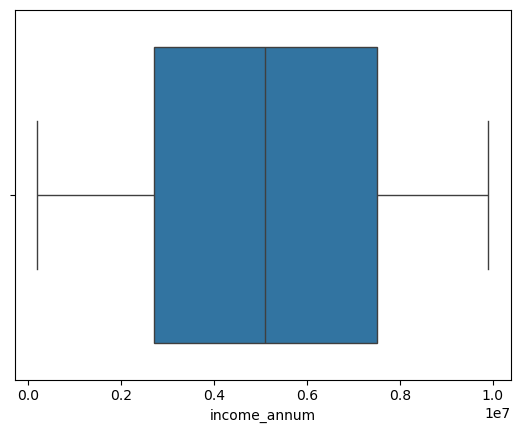

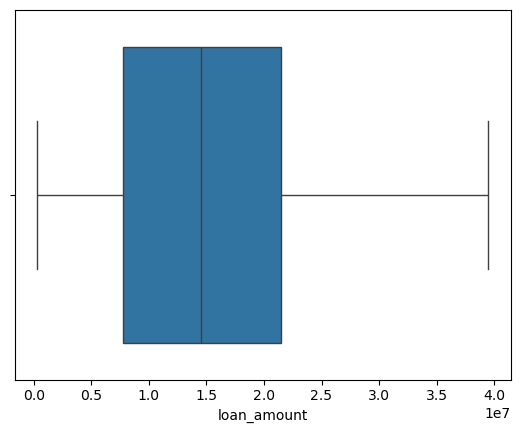

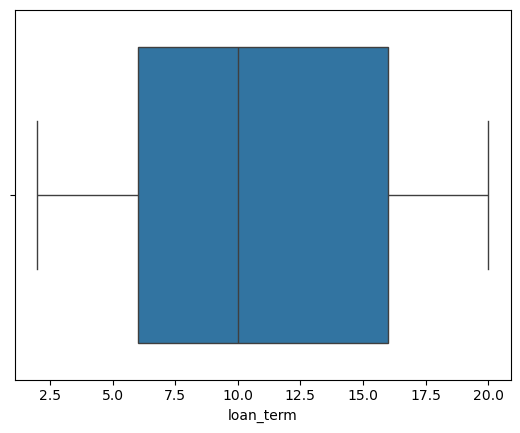

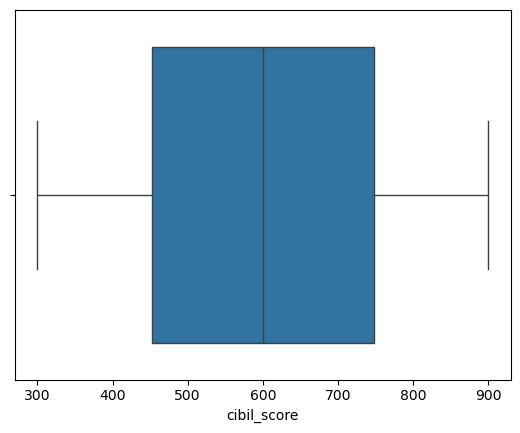

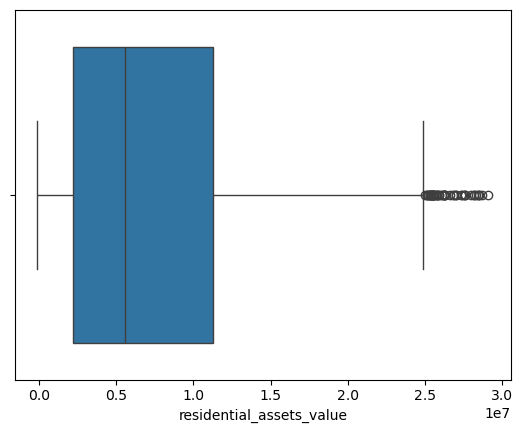

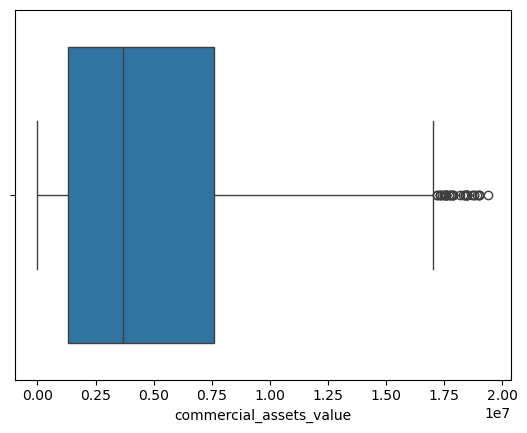

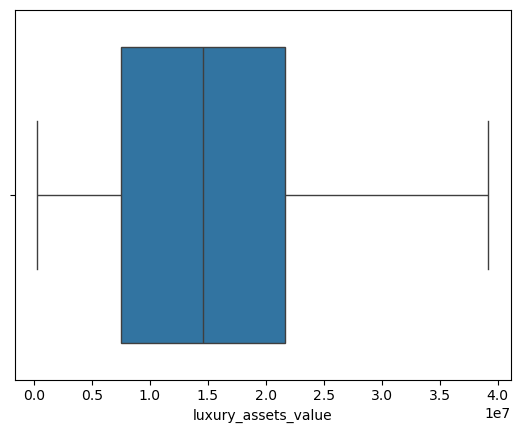

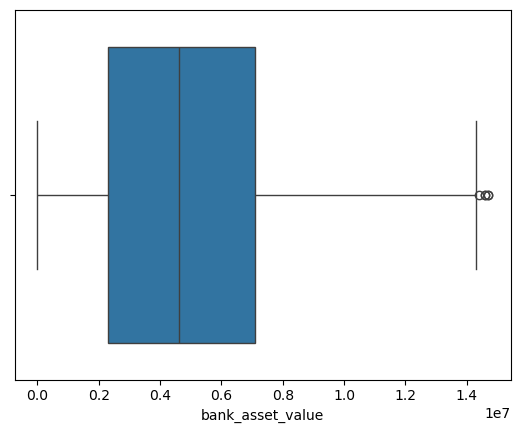

In [26]:
for i in lst:
    sns.boxplot(data=df,x=i)
    plt.show()
# Insights : Here, Box Plot have been shown for income_annum, loan_amount, loan_term, 
# cibil_score, residential_assets_value, commercial_assets_value, luxury_assets_value & bank_asset_value.

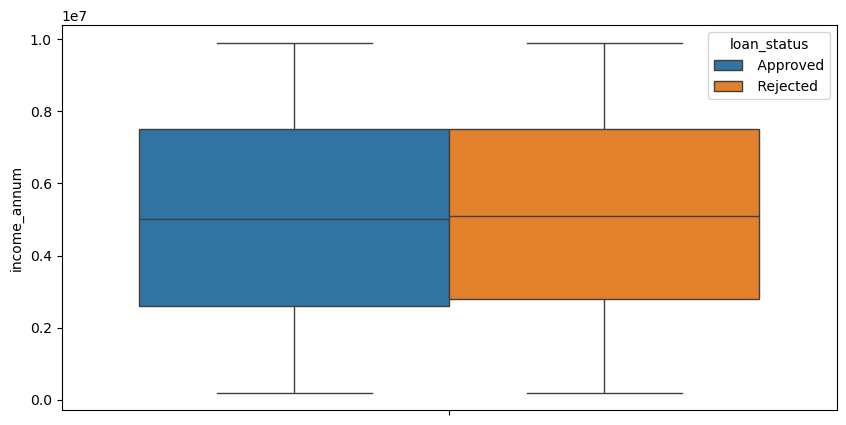

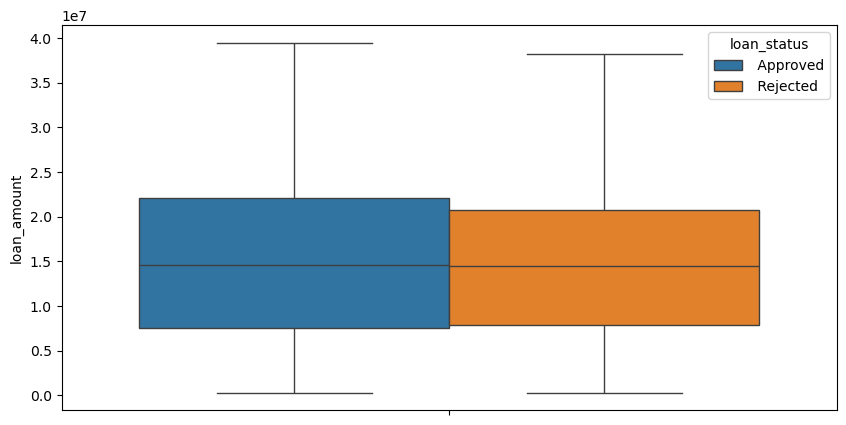

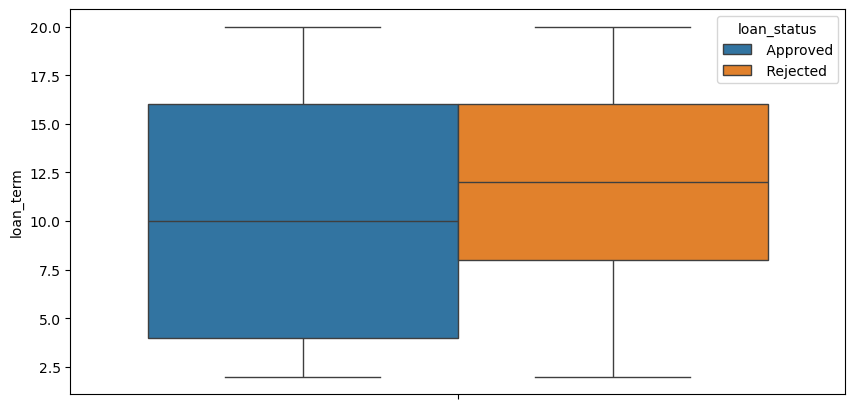

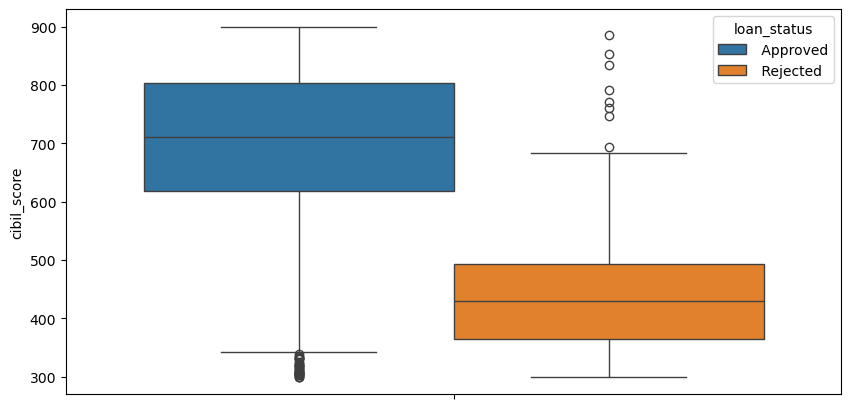

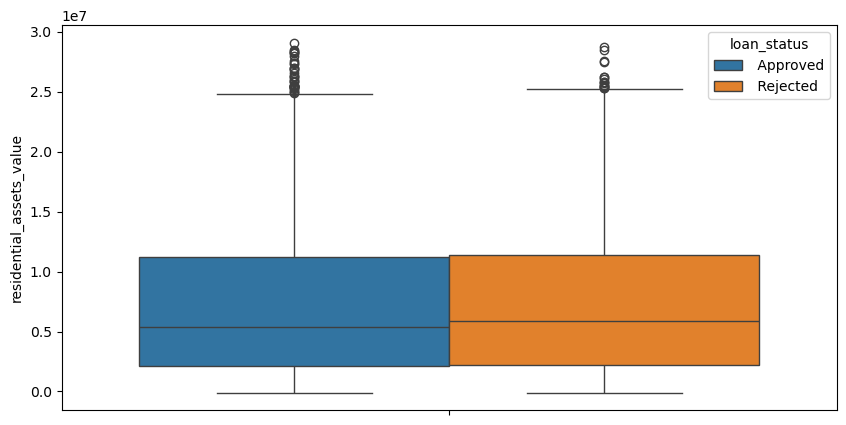

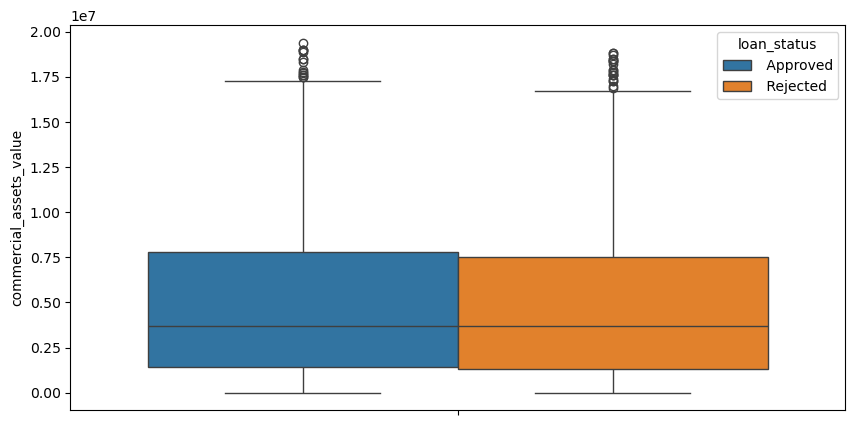

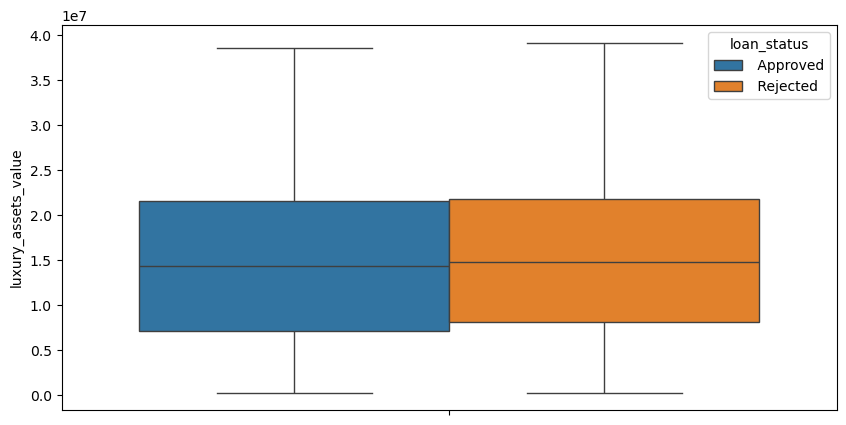

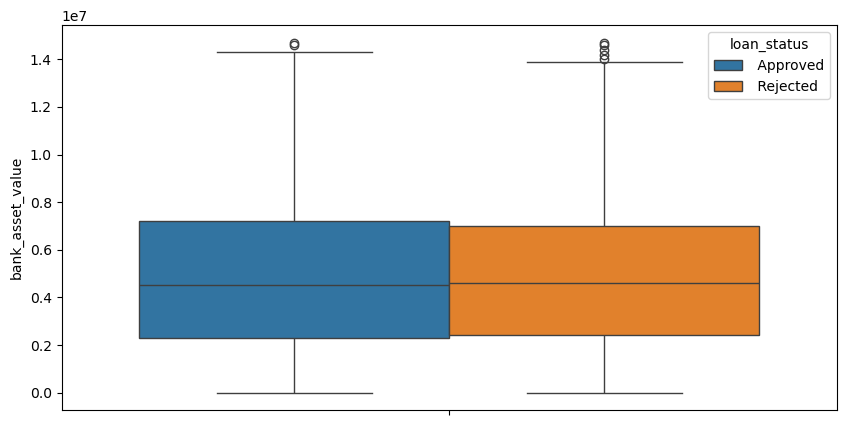

In [27]:
for i in lst:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df,y=i,hue='loan_status')
    plt.show()
# Insights : Here, Box plot of loan_status have been shown. 
# Approved loan_status have shown in Blue Color & Rejected loan_status have shown in Orange Color. 
# Here, loan_status are shown for different categories differently.

<Figure size 1000x500 with 0 Axes>

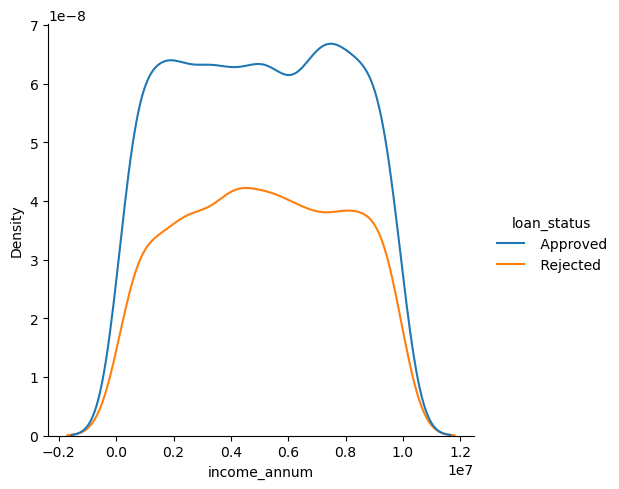

<Figure size 1000x500 with 0 Axes>

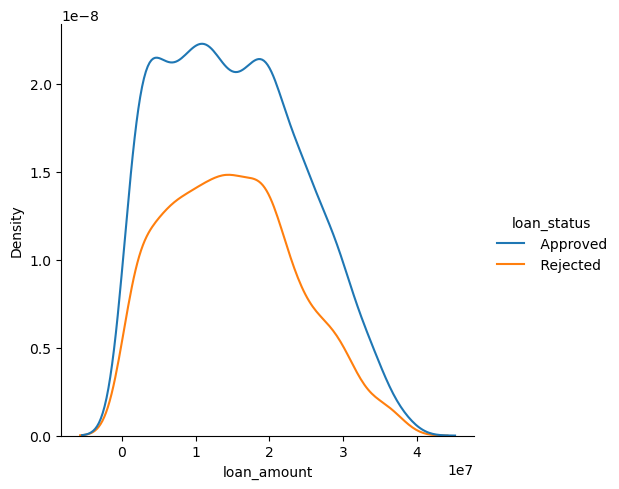

<Figure size 1000x500 with 0 Axes>

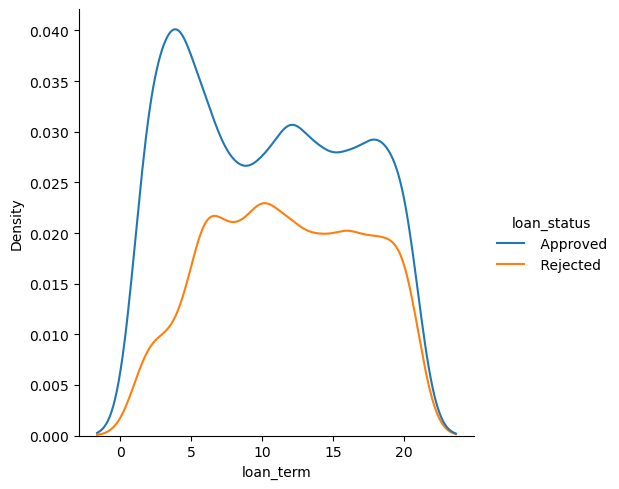

<Figure size 1000x500 with 0 Axes>

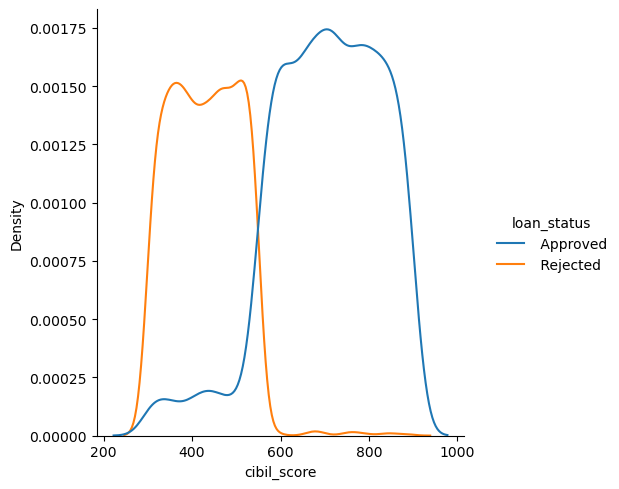

<Figure size 1000x500 with 0 Axes>

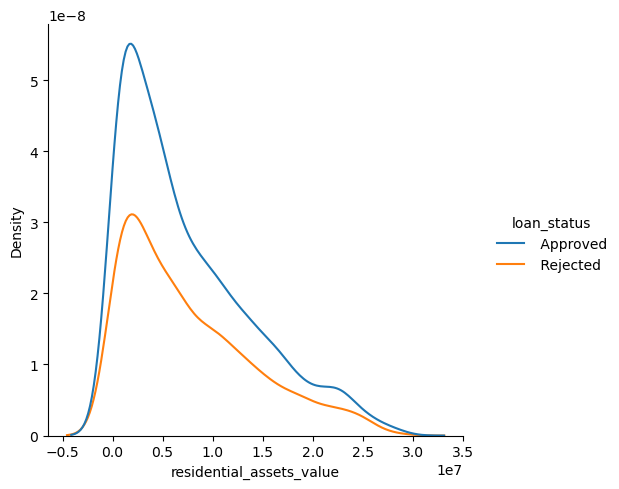

<Figure size 1000x500 with 0 Axes>

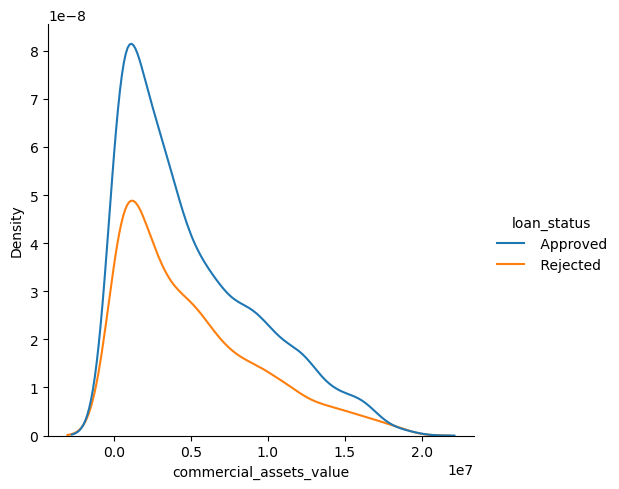

<Figure size 1000x500 with 0 Axes>

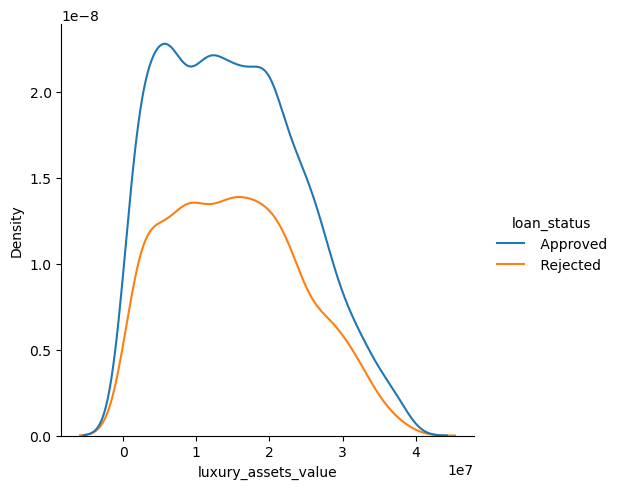

<Figure size 1000x500 with 0 Axes>

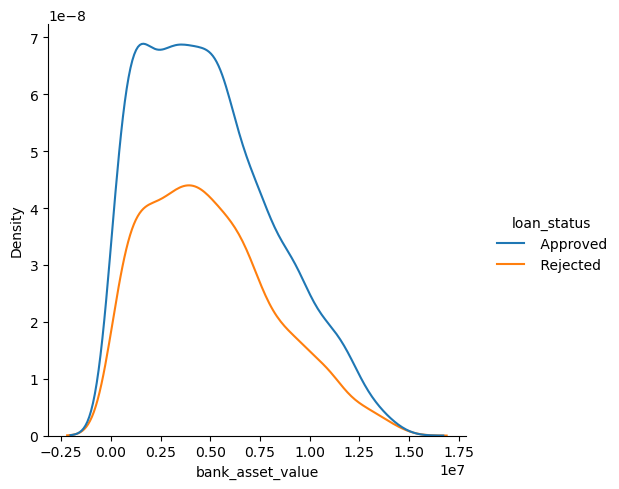

In [28]:
for i in lst:
    plt.figure(figsize=(10,5))
    sns.displot(data=df,x=i,hue='loan_status',kind='kde')
    plt.show()
# Insights : Here, Distribution Plot shows the Density wise loan_status. 
# Also, loan_status of Approved have shown in Blue color & loan_status of Rejected have shown in Orange color by list.

In [29]:
###  From the above chart we can say if a person has cibil score higher let say >500
##  more chances are there that the person will get the loan.

In [30]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

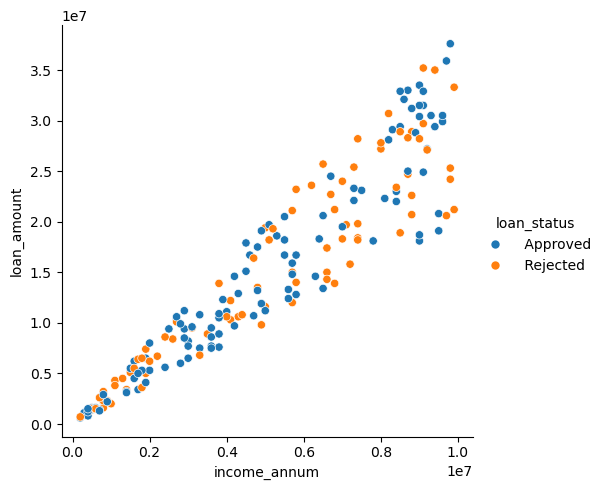

In [31]:
sns.relplot(data=df.iloc[:200,:],x='income_annum',y='loan_amount',kind='scatter',hue='loan_status')
plt.show()
# Insight : As the income increses the loan amount also increases .

<Axes: >

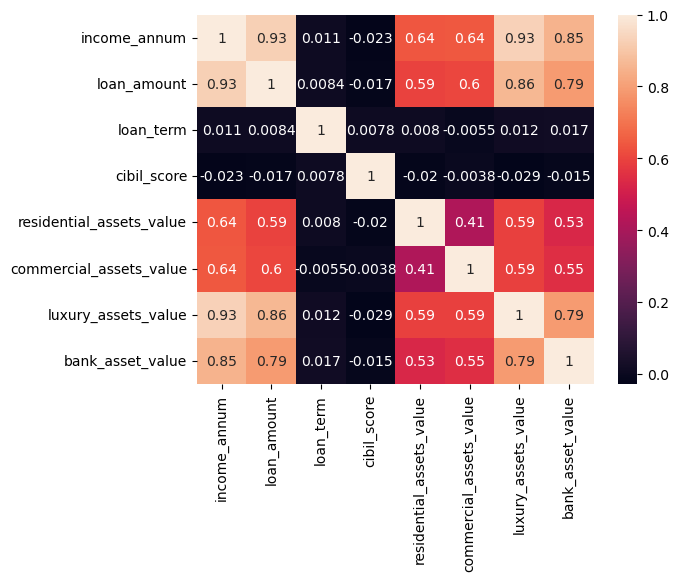

In [32]:
## Heatmap
sns.heatmap(df[lst].corr(),annot=True)
# Insights : Here, Heat Map shows the Correlation Matrix. 
## From this we can observe that most of the asset values and annual income are highly correlated.
## cibil score ,loan term has no relation with annual income .

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
I have try some more Charts
<a class="anchor" id="2"></a> 

In [33]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [34]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

In [35]:
lst=list(df['loan_status'].unique())
lst

[' Approved', ' Rejected']

In [36]:
## Encoding for loan_status

df['loan_status']=df['loan_status'].map({' Approved':1,' Rejected':0})

In [37]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [38]:
## Using Label encoder 
from sklearn.preprocessing import LabelEncoder
for i in ['education','self_employed']:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    print(le.classes_)

[' Graduate' ' Not Graduate']
[' No' ' Yes']


In [39]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [40]:
## if I have deploying this model I have to do transformation for
## the datapoint.

In [41]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

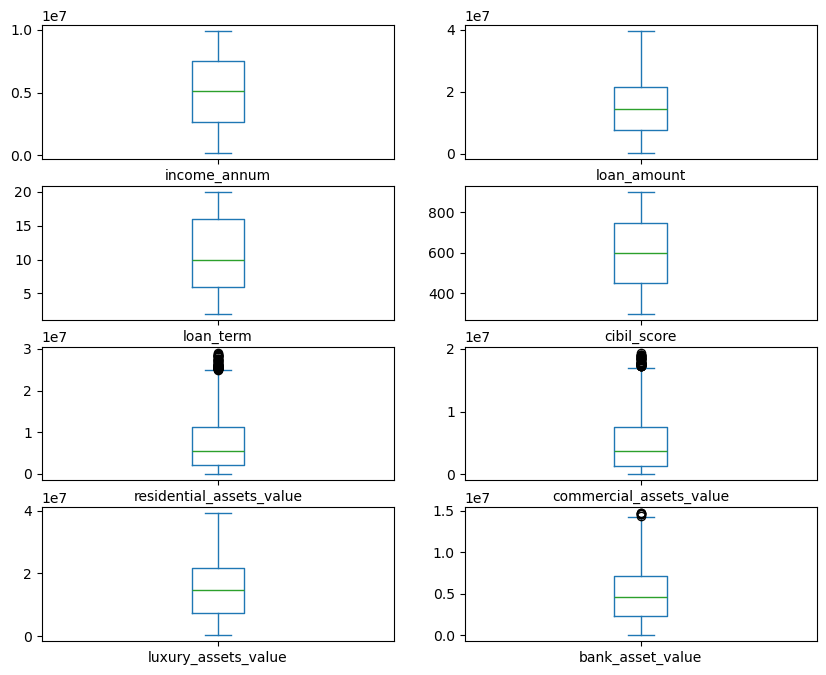

In [42]:
## Outlier removal
lst=['income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']
df[lst].plot(kind='box',subplots=True,layout=(4,2),figsize=(10,8))
plt.show()
# Insights : Here, Box Plot shows the Outlier Removal Treatment.

In [43]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [44]:
## Treat the outliers 
lst=['residential_assets_value','commercial_assets_value','bank_asset_value']
q1=df[lst].quantile(0.25)
q3=df[lst].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr
print(ub)
print(lb)

residential_assets_value    24950000.0
commercial_assets_value     17050000.0
bank_asset_value            14300000.0
dtype: float64
residential_assets_value   -11450000.0
commercial_assets_value     -8150000.0
bank_asset_value            -4900000.0
dtype: float64


In [45]:
### Outlier Detection
outlier_indices=df[((df[lst]>ub)|(df[lst]<lb))].any(axis=1)
outlier_indices = df[outlier_indices].index
print(len(outlier_indices))

91


In [46]:
df.shape

(4269, 13)

In [47]:
## Removing the Outliers 
new_df=df[~(df[((df[lst]>ub)|(df[lst]<lb))].any(axis=1))]
new_df.shape

(4178, 13)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Seperating Depending & Independant Variables
<a class="anchor" id="2"></a> 

In [48]:
new_df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
5,6,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0


In [49]:
x=new_df.drop(['loan_id','loan_status'],axis=1)
y=new_df['loan_status']

In [50]:
x.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000
5,0,0,1,4800000,13500000,10,319,6800000,8300000,13700000,5100000


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Scaling For Independant Columns
<a class="anchor" id="2"></a> 

In [51]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)

In [52]:
x_scaled

array([[-1.47482811,  1.009137  ,  0.99332054, ..., -0.62235314,
        -0.67466211, -0.49485268],
       [ 0.29530457, -0.99094573, -1.00672438, ..., -0.0752499 ,
         2.0491862 ,  2.49049472],
       [ 0.29530457, -0.99094573, -1.00672438, ..., -0.36069507,
         0.93741138,  0.95068396],
       ...,
       [-0.29473966,  1.009137  , -1.00672438, ...,  1.8039308 ,
         0.35928847,  0.7621357 ],
       [-0.88478389,  1.009137  , -1.00672438, ..., -0.9791596 ,
        -0.08542145,  0.29076506],
       [-0.88478389, -0.99094573, -1.00672438, ...,  1.66120822,
         2.31601216,  2.23909705]])

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Train Test Split
<a class="anchor" id="2"></a> 

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=101,test_size=0.2,stratify=y)
print('Training data shape',x_train.shape)
print('Training class count',y_train.value_counts())
print('*****************************************************')
print('Testing data shape',x_test.shape)
print('Testing class count',y_test.value_counts())

Training data shape (3342, 11)
Training class count loan_status
1    2082
0    1260
Name: count, dtype: int64
*****************************************************
Testing data shape (836, 11)
Testing class count loan_status
1    521
0    315
Name: count, dtype: int64


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Model Building
<a class="anchor" id="2"></a> 

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Logistic Regression
<a class="anchor" id="4"></a>

In [54]:
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [55]:
classifiers={'LogReg':LogisticRegression(class_weight='balanced'),\
            'D_tree':DecisionTreeClassifier(),\
            'Rforest':RandomForestClassifier(n_estimators=150),\
            'Knn':KNeighborsClassifier(),\
            'svm':SVC(),\
            'Naivebayes':GaussianNB()}
print(classifiers['Rforest'])        

RandomForestClassifier(n_estimators=150)


In [56]:
model=classifiers['LogReg']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 0.701376421304608
Testing Accuracy 0.7177033492822966
Confusion Matrix [[160 155]
 [ 81 440]]


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Decision Tree
<a class="anchor" id="4"></a>

In [57]:
model=classifiers['D_tree']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 1.0
Testing Accuracy 0.9904306220095693
Confusion Matrix [[313   2]
 [  6 515]]


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Random Forest
<a class="anchor" id="4"></a>

In [58]:
model=classifiers['Rforest']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 1.0
Testing Accuracy 0.992822966507177
Confusion Matrix [[313   2]
 [  4 517]]


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
K Nearest Neighbors
<a class="anchor" id="4"></a>

In [59]:
model=classifiers['Knn']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 0.72262118491921
Testing Accuracy 0.5538277511961722
Confusion Matrix [[ 95 220]
 [153 368]]


<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
SVM
<a class="anchor" id="4"></a>

In [60]:
model=classifiers['svm']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 0.6229802513464991
Testing Accuracy 0.6232057416267942
Confusion Matrix [[  0 315]
 [  0 521]]


<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
Naive Bayes
</div>

In [61]:
model=classifiers['Naivebayes']
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))

Training Accuracy 0.7684021543985637
Testing Accuracy 0.7870813397129187
Confusion Matrix [[149 166]
 [ 12 509]]


In [62]:
from sklearn.metrics import roc_auc_score

In [111]:

def prediction(key):
    model=classifiers[key]
    print(f'******Model is {key}******')
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('Training Accuracy',accuracy_score(y_train,y_pred_train))
    print('Testing Accuracy',accuracy_score(y_test,y_pred_test))
    print('Confusion Matrix',confusion_matrix(y_test,y_pred_test))
    print('Area under the curve is' ,roc_auc_score(y_test,y_pred_test))

In [112]:
for i in classifiers:
    print('***************************************************************************')
    prediction(i)
    print('****************************************************************************')

***************************************************************************
******Model is LogReg******
Training Accuracy 0.701376421304608
Testing Accuracy 0.7177033492822966
Confusion Matrix [[160 155]
 [ 81 440]]
Area under the curve is 0.6762331292081771
****************************************************************************
***************************************************************************
******Model is D_tree******
Training Accuracy 1.0
Testing Accuracy 0.9916267942583732
Confusion Matrix [[313   2]
 [  5 516]]
Area under the curve is 0.992026932334034
****************************************************************************
***************************************************************************
******Model is Rforest******
Training Accuracy 1.0
Testing Accuracy 0.9940191387559809
Confusion Matrix [[313   2]
 [  3 518]]
Area under the curve is 0.9939463181305792
****************************************************************************
********************

In [65]:
# Outlier treatment
# Scaling
# Model Building --->All algorithms with cross validation
# Hyperparameter tuning
# Best ALgorithm

In [66]:
## As Randomforest is giving a good training and testing score also fp and fn values
# are also less for same we can use it for final prediction.

In [67]:
## Cross validation ############################

<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
Random Forest Classifier
</div>

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=150)

In [69]:
y_pred_train=rf.predict(x_train)
y_pred_test=rf.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))

Training Accuracy 1.0
Testing Accuracy 0.9940191387559809


In [71]:
confusion_matrix(y_test,y_pred_test)

array([[313,   2],
       [  3, 518]], dtype=int64)

<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
Hyperparameter Tunning For Random Forest
</div>

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
import time
param_grid={'criterion':['gini','entropy'],'bootstrap':[True,False],
            'max_features':['log2','sqrt','auto']}
start_time=time.time()
rf=RandomForestClassifier()
hyper_parameter=GridSearchCV(estimator=rf,param_grid=param_grid,n_jobs=-1,cv=10)
hyper_parameter.fit(x_train,y_train)
end_time=time.time()

In [74]:
print('Time taken',end_time-start_time)

Time taken 25.90554976463318


In [75]:
print('best paramters are',hyper_parameter.best_params_)

best paramters are {'bootstrap': False, 'criterion': 'gini', 'max_features': 'sqrt'}


In [76]:
y_pred_hyper_test=hyper_parameter.predict(x_test)
y_pred_hyper_train=hyper_parameter.predict(x_train)

In [77]:
# Accuracy score for hyperparameter tuning
print('Training Accuracy',accuracy_score(y_train,y_pred_hyper_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_hyper_test))

Training Accuracy 1.0
Testing Accuracy 0.9904306220095693


<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
OOB Score
</div>

In [78]:
### To find out optimal no of trees in Random Forest we can use OOB method : Out of bag
## whenever we are doing bootstrapping ie sampling of the training data
## 1/3 rd of the data remaines as it it is not provided to any of thr model for training
## that data is called as outofbag
## by doing the prediction on that we can find OOB score.

In [79]:
best_params=hyper_parameter.best_params_
final_model=RandomForestClassifier(best_params,random_state=42)

In [80]:
final_model.set_params(oob_score=True)

RandomForestClassifier(n_estimators={'bootstrap': False, 'criterion': 'gini',
                                     'max_features': 'sqrt'},
                       oob_score=True, random_state=42)

In [81]:
min_tree=15
max_tree=500
error_rate = {}

# iterating the rf for the oob values wrt to trees
for trees in range(min_tree, max_tree+1):
    final_model.set_params(n_estimators=trees)
    final_model.fit(x_train, y_train)
    oob_error = 1-final_model.oob_score_
    error_rate[trees] = oob_error
oob_data=pd.Series(error_rate)
oob_data.head()

15    0.029324
16    0.030521
17    0.031119
18    0.032017
19    0.031718
dtype: float64

Text(0, 0.5, 'OOB error')

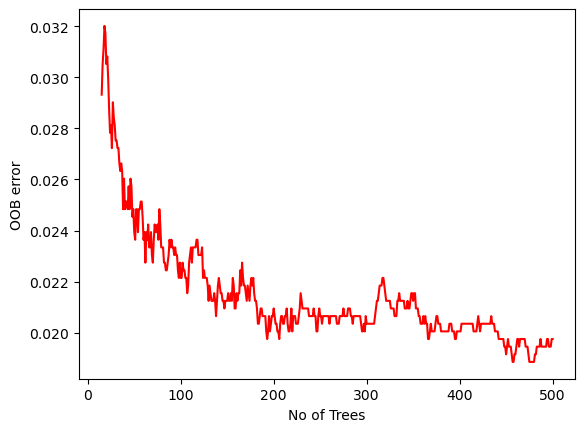

In [82]:
oob_data.plot(kind='line',color='red')
plt.xlabel('No of Trees')
plt.ylabel('OOB error')

In [83]:
## We can say as fluctuation is there.we can take any value as a no of trees in our data 
## let us take no of trees=400

In [84]:
best_params=hyper_parameter.best_params_
final_model=RandomForestClassifier(best_params,random_state=42)
final_model.set_params(n_estimators=400)

RandomForestClassifier(n_estimators=400, random_state=42)

In [85]:
final_model.fit(x_train,y_train)
# prediction for x_train ,x_test
y_pred_train=final_model.predict(x_train)
y_pred_test=final_model.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Training Accuracy',accuracy_score(y_train,y_pred_train))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test))

Training Accuracy 1.0
Testing Accuracy 0.992822966507177


In [87]:
confusion_matrix(y_test,y_pred_test)

array([[313,   2],
       [  4, 517]], dtype=int64)

<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
Applying KNN
</div>

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
y_pred_train_knn=knn.predict(x_train)
y_pred_test_knn=knn.predict(x_test)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print('Training Accuracy',accuracy_score(y_train,y_pred_train_knn))
print('Testing Accuracy',accuracy_score(y_test,y_pred_test_knn))

Training Accuracy 0.72262118491921
Testing Accuracy 0.5538277511961722


In [91]:
confusion_matrix(y_test,y_pred_test_knn)

array([[ 95, 220],
       [153, 368]], dtype=int64)

In [92]:
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.38      0.30      0.34       315
           1       0.63      0.71      0.66       521

    accuracy                           0.55       836
   macro avg       0.50      0.50      0.50       836
weighted avg       0.53      0.55      0.54       836



<div style="color: #216969;
            background-color: #EAF6F6;
            font-size: 200%;
            border-radius:15px;
            text-align:center;
            font-weight:600;
            border-style: solid;
            border-color: dark green;
            font-family: 'Verdana';">
Choosing a Value Of K
</div>

In [93]:
accuracy = []
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    accuracy_i = accuracy_score(y_test, pred_i)
    accuracy.append(accuracy_i)

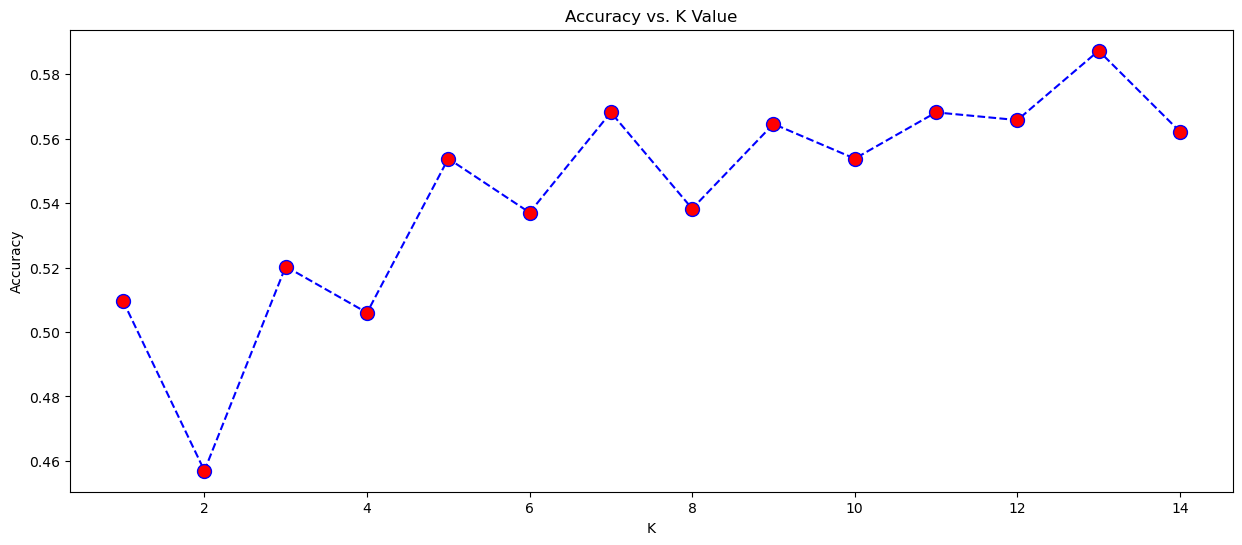

In [94]:
plt.figure(figsize=(15,6))
plt.plot(range(1,15, 1), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [95]:
# Maximum accuracy occurs when k = 13, lets re train our model for k = 13

In [96]:
knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Evaluation
<a class="anchor" id="6"></a>

In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

Accuracy: 58.73%


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.19      0.25       315
           1       0.63      0.83      0.71       521

    accuracy                           0.59       836
   macro avg       0.51      0.51      0.48       836
weighted avg       0.54      0.59      0.54       836



<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
Applying the SVM
<a class="anchor" id="6"></a>

In [99]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)

SVC()

In [100]:
#prediction
y_pred_train_svm=svm.predict(x_train)
y_pred_test_svm=svm.predict(x_test)

In [101]:
## Accuracy score
print("Training accuracy",accuracy_score(y_train,y_pred_train_svm))
print("Testing accuracy",accuracy_score(y_test,y_pred_test_svm))

Training accuracy 0.6229802513464991
Testing accuracy 0.6232057416267942


In [102]:
import pickle 
with open('model.pkl','wb') as file:
    pickle.dump(rf,file)
with open('scaler.pkl','wb') as scaler:
    pickle.dump(ss,scaler)

In [103]:
!pip install streamlit

<div style='color: #216969;
           background-color: #EAF6F6;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
*** Thank You !!! ***
<a class="anchor" id="6"></a>